In [16]:
import numpy as np
# from Scripts.DataManager.DabasePreparations.AmazonReviewSentiGraph import AmazonReviewSentiGraph
# from Scripts.Models.ModelsManager.SimpleGraphClassifierModelManager import SimpleGraphClassifierModelManager
from Scripts.Configs.ConfigClass import Config
config = Config(r'C:\Users\fardin\Projects\ColorIntelligence')
from Scripts.DataManager.GraphConstructor.GraphConstructor import TextGraphType
import os
# os.environ['TORCH_USE_CUDA_DSA']
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = 'cuda'
batch_size = 8

In [17]:
from Scripts.DataManager.GraphLoader.AmazonReviewGraphDataModule import AmazonReviewGraphDataModule

In [18]:
data_manager = AmazonReviewGraphDataModule(config, True, True, shuffle=True, num_data_load = 100, device='cpu', batch_size=batch_size, graph_type=TextGraphType.CO_OCCURRENCE)

self.num_data_load: 100
filename: C:\Users\fardin\Projects\ColorIntelligence\data/GraphData/AmazonReview\graph_var.txt
 0 graph loaded
self.num_data_load: 100
self.labels.shape: torch.Size([100, 1])


In [19]:
t_dataloader = data_manager.train_dataloader()
v_dataloader = data_manager.val_dataloader()
X1, y1 = next(iter(t_dataloader))
X2, y2 = next(iter(v_dataloader))
print(X1[0].x.device)
print(X2[0].x.device)

cpu
cpu


In [20]:
from Scripts.Models.BaseModels.GcnGatModel1 import GcnGatModel1
from Scripts.Models.LightningModels.LightningModels import BinaryLightningModel
import torch

In [21]:
torch_model = GcnGatModel1(300, 1, 256, dropout=0.2)
torch_model = torch_model.to(device)
# print(next(iter(torch_model.parameters())).device)
pre = torch_model(X1.to(device))

In [22]:
lightning_model = BinaryLightningModel(torch_model,
                                 torch.optim.Adam(torch_model.parameters(), lr=0.00017, weight_decay=0.00055),
                                       torch.nn.BCEWithLogitsLoss(),
                                       learning_rate=0.00017,
                                       batch_size=batch_size,
                                       ).to(device)

c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [23]:
# from Scripts.Models.LightningModels.LightningModels import BaseLightningModel
# from abc import ABC, abstractmethod
# from typing import List, Optional

# import torch
# import lightning as L
# from lightning.pytorch.callbacks import Callback, ModelCheckpoint, EarlyStopping
# from lightning.pytorch.loggers import Logger, CSVLogger
# from lightning.pytorch.tuner import Tuner

# class ModelManager(ABC):

#     def __init__(self,
#                  torch_model: torch.nn.Module,
#                  lightning_model: BaseLightningModel,
#                  model_save_dir: str = '~/Desktop',
#                  log_dir: str = 'logs/',
#                  log_name: str = 'model_logs',
#                  device='cpu',
#                  max_epochs = 100,
#                  ckpt_path: str|None=None):
#         self.torch_model = torch_model
#         self.lightning_model: BaseLightningModel = lightning_model
#         self.log_dir = log_dir
#         self.log_name = log_name
#         self.model_save_dir = model_save_dir
#         self.device = device
#         self.accelerator = 'cpu' if self.device=='cpu' else 'gpu'
#         self.max_epochs = max_epochs
#         self.ckpt_path = ckpt_path

#         self.logger = self._create_logger()
#         self.callbacks = self._create_callbacks()
#         self.trainer: L.Trainer = self._create_trainer()
#         self.tuner = Tuner(self.trainer)
#         self.tuning_result = None

#     def tune(self, data_manager, draw_result=True, min_lr=0.0000001, max_lr=0.1):
#         self.tuning_result = self.tuner.lr_find(self.lightning_model, datamodule=data_manager, min_lr=min_lr,max_lr=max_lr)
#         if draw_result:
#             fig = self.tuning_result.plot(suggest=True)
#             fig.show()
#         self.update_learning_rate(self.tuning_result.suggestion())
#         return self.tuning_result.suggestion()

#     def update_learning_rate(self, lr):
#         self.lightning_model.update_learning_rate(lr)

#     def fit(self, train_dataloaders=None, val_dataloaders=None, datamodule=None, max_epochs = -1, ckpt_path=None):
#         if ckpt_path!=None and ckpt_path != '':
#             self.ckpt_path = ckpt_path
#         if max_epochs>0:
#             self.max_epochs = max_epochs
#             self.trainer = self._create_trainer()
#         self.trainer.fit(self.lightning_model,
#                          datamodule=datamodule,
#                          train_dataloaders=train_dataloaders,
#                          val_dataloaders=val_dataloaders,
#                          ckpt_path = self.ckpt_path
#                          )

#     def validate(self, dataloaders=None, datamodule=None):
#         return self.trainer.validate(self.lightning_model,
#                              datamodule=datamodule,
#                              dataloaders=dataloaders)

#     def predict(self, dataloaders=None, datamodule=None):
#         return self.trainer.predict(self.lightning_model,
#                              datamodule=datamodule,
#                              dataloaders=dataloaders)

#     def _create_trainer(self) -> L.Trainer:
#         return L.Trainer(
#             callbacks=self.callbacks,
#             max_epochs=self.max_epochs,
#             accelerator=self.accelerator,
#             logger=self.logger,
#             num_sanity_val_steps=0,
#             default_root_dir=self.model_save_dir
#         )

#     @abstractmethod
#     def _create_callbacks(self) -> List[Callback]:
#         pass

#     def _create_logger(self) -> Logger:
#         return CSVLogger(save_dir=self.log_dir, name=self.log_name)

#     @abstractmethod
#     def draw_summary(self, dataloader):
#         pass

#     @abstractmethod
#     def plot_csv_logger(self, loss_names, eval_names):
#         pass


In [24]:
# import torch
# from Scripts.Models.LightningModels.LightningModels import BaseLightningModel
# # from Scripts.Models.ModelsManager.ModelManager import ModelManager
# # from Scripts.Models.ClassifierModels.GATGCNClassifierSimple import GNNClassifier
# import pandas as pd
# import matplotlib.pyplot as plt

# import lightning as L
# from torch_geometric.nn import summary

# class ClassifierModelManager(ModelManager):

#     def __init__(self,
#                  torch_model: torch.nn.Module,
#                  lightning_model: BaseLightningModel,
#                  model_save_dir: str = '~/Desktop',
#                  log_dir: str = 'logs/',
#                  log_name: str = 'model_logs',
#                  device='cpu',
#                  num_train_epoch = 100):
#         super(ClassifierModelManager, self).__init__(torch_model, lightning_model, model_save_dir, log_dir,
#                                                      log_name, device, num_train_epoch)

#     def _create_callbacks(self) -> List[Callback]:
#         return [
#             ModelCheckpoint(save_top_k=2, mode='max', monitor='val_acc', save_last=True),
#             EarlyStopping(patience=50, mode='max', monitor='val_acc')
#         ]

#     def draw_summary(self, dataloader):
#         X, y = next(iter(dataloader))
#         print(summary(self.torch_model, X))

#     def plot_csv_logger(self, loss_names=['train_loss', 'val_loss'], eval_names=['train_acc', 'val_acc']):
#         csv_path = os.path.join(self.log_dir, self.log_name, f'version_{self.logger.version}', 'metrics.csv')
#         metrics = pd.read_csv(csv_path)

#         aggregation_metrics = []
#         agg_col = 'epoch'
#         for i, dfg in metrics.groupby(agg_col):
#             agg = dict(dfg.mean())
#             agg[agg_col] = i
#             aggregation_metrics.append(agg)

#         df_metrics = pd.DataFrame(aggregation_metrics)
#         df_metrics[loss_names].plot(grid=True, legend=True, xlabel='Epoch', ylabel='loss')
#         df_metrics[eval_names].plot(grid=True, legend=True, xlabel='Epoch', ylabel='accuracy')
#         plt.show()


In [25]:
from Scripts.Models.ModelsManager.ClassifierModelManager import ClassifierModelManager

In [26]:
model_manager = ClassifierModelManager(torch_model, lightning_model)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


In [27]:
model_manager.fit(datamodule=data_manager)

c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\utilities\parsing.py:43: attribute 'model' removed from hparams because it cannot be pickled

  | Name      | Type              | Params
------------------------------------------------
0 | model     | GcnGatModel1      | 629 K 
1 | loss_func | BCEWithLogitsLoss | 0     
2 | train_acc | BinaryAccuracy    | 0     
3 | val_acc   | BinaryAccuracy    | 0     
4 | test_acc  | BinaryAccuracy    | 0     
------------------------------------------------
629 K     Trainable params
0         Non-trainable params
629 K     Total params
2.516     Total estimated model params size (MB)


bbbb


c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\call.py:58: Detected KeyboardInterrupt, attempting graceful shutdown...


In [12]:
model_manager.fit(datamodule=data_manager, max_epochs=20, ckpt_path='best')

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
c:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:630: Checkpoint directory logs/model_logs\version_5\checkpoints exists and is not empty.
Restoring states from the checkpoint path at logs/model_logs\version_5\checkpoints\epoch=4-step=35.ckpt

  | Name      | Type              | Params
------------------------------------------------
0 | model     | GcnGatModel1      | 629 K 
1 | loss_func | BCEWith

bbbb


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


In [13]:
model_manager.log_dir, model_manager.log_name

('logs/', 'model_logs')

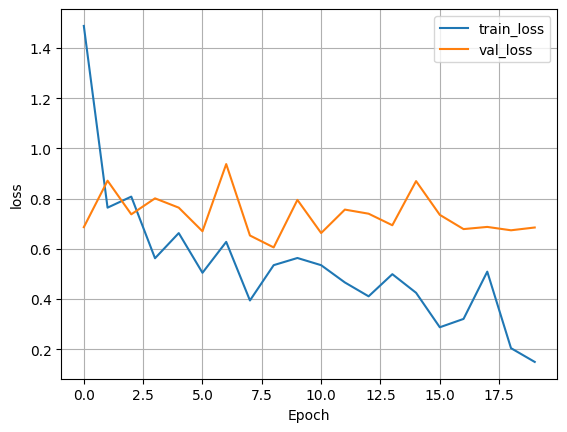

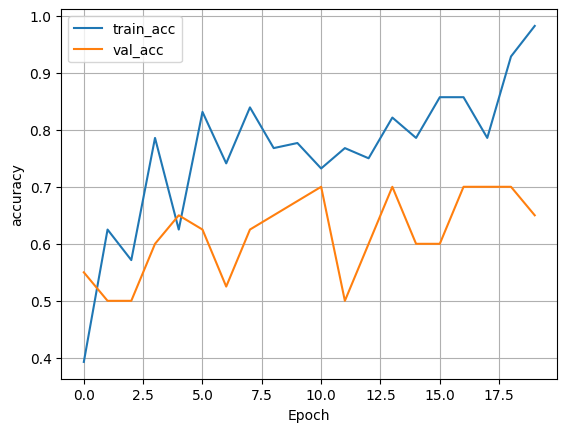

In [14]:
model_manager.plot_csv_logger()

In [15]:
model_manager.draw_summary(dataloader=t_dataloader)

+---------------------------------+-------------------------------------------------------+----------------------------------------------+----------+
| Layer                           | Input Shape                                           | Output Shape                                 | #Param   |
|---------------------------------+-------------------------------------------------------+----------------------------------------------+----------|
| GcnGatModel1                    | [463, 463]                                            | [8, 1]                                       | 629,029  |
| ├─(encoder)Sequential_6d7686    | [463, 300], [2, 3502], [3502]                         | [463, 256], [463, 128], [463, 64], [463, 32] | 298,208  |
| │    └─(module_0)GCNConv        | [463, 300], [2, 3502], [3502]                         | [463, 256]                                   | 77,056   |
| │    └─(module_1)BatchNorm      | [463, 256]                                            | [463, 25

bbbb


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 74 steps due to diverging loss.
Learning rate set to 1.0471285480508998e-06
Restoring states from the checkpoint path at ~\Desktop\.lr_find_c1f9be0a-378f-433c-8017-79650d51b3c8.ckpt
Restored all states from the checkpoint at ~\Desktop\.lr_find_c1f9be0a-378f-433c-8017-79650d51b3c8.ckpt
C:\Users\fardin\AppData\Local\Temp\ipykernel_19660\4252807159.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1.0471285480508998e-06

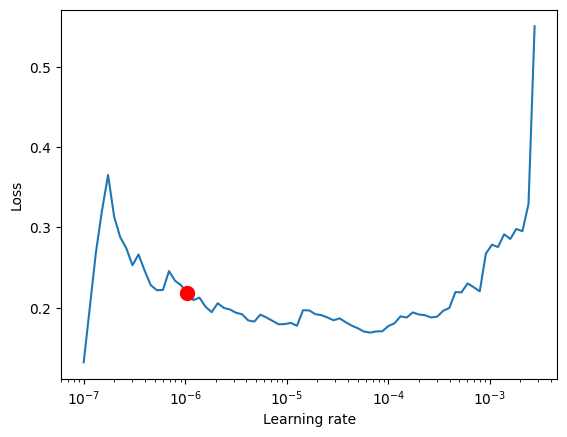

In [37]:
model_manager.tune(data_manager=data_manager)

In [38]:
model_manager.fit(datamodule=data_manager, max_epochs=10)

AttributeError: can't set attribute 'max_steps'